<a href="https://colab.research.google.com/github/Somesh140/iNeauron_FSDS_Assignments/blob/main/Interview_based_assesment/statistics/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

# Read the data
URL="https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=sharing"
reconstructed_url='https://drive.google.com/uc?id=' + URL.split('/')[-2]
data = pd.read_csv(reconstructed_url)
data.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [11]:
data.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [14]:
data[" Blood Pressure Before (mmHg)"].max()

148

In [15]:
data[" Blood Pressure Before (mmHg)"].min()

120

In [16]:
data[" Blood Pressure After (mmHg)"].max()

141

In [17]:
data[" Blood Pressure After (mmHg)"].min()

118

In [21]:
# Calculate the dispersion
before_dispersion = data[" Blood Pressure Before (mmHg)"].max() - data[" Blood Pressure Before (mmHg)"].min()
after_dispersion = data[" Blood Pressure After (mmHg)"].max() - data[" Blood Pressure After (mmHg)"].min()
before_variance = np.var(data[" Blood Pressure Before (mmHg)"])
after_variance = np.var(data[" Blood Pressure After (mmHg)"])
before_std = np.std(data[" Blood Pressure Before (mmHg)"])
after_std = np.std(data[" Blood Pressure After (mmHg)"])

print("Blood Pressure Before Dispersion:")
print("Range:", before_dispersion)
print("Variance:", before_variance)
print("Standard Deviation:", before_std)

print("\nBlood Pressure After Dispersion:")
print("Range:", after_dispersion)
print("Variance:", after_variance)
print("Standard Deviation:", after_std)


Blood Pressure Before Dispersion:
Range: 28
Variance: 43.10189999999999
Standard Deviation: 6.56520372875054

Blood Pressure After Dispersion:
Range: 23
Variance: 46.97039999999999
Standard Deviation: 6.853495458523336


Blood Pressure Before:
Mean: 133.91
Confidence Interval: (132.6232200691649, 135.1967799308351)

Blood Pressure After:
Mean: 128.36
Confidence Interval: (127.01671489012944, 129.7032851098706)


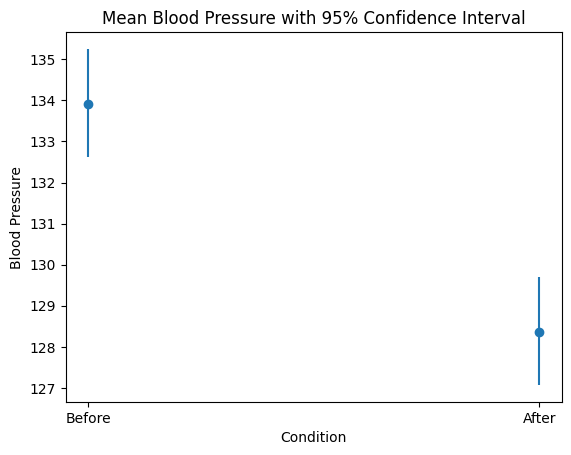

In [22]:
# Calculate the mean
before_mean = np.mean(data[" Blood Pressure Before (mmHg)"])
after_mean = np.mean(data[" Blood Pressure After (mmHg)"])

# Calculate the standard error
before_se = before_std / np.sqrt(len(data[" Blood Pressure Before (mmHg)"]))
after_se = after_std / np.sqrt(len(data[" Blood Pressure After (mmHg)"]))

# Calculate the confidence interval
before_ci = (before_mean - 1.96 * before_se, before_mean + 1.96 * before_se)
after_ci = (after_mean - 1.96 * after_se, after_mean + 1.96 * after_se)

print("Blood Pressure Before:")
print("Mean:", before_mean)
print("Confidence Interval:", before_ci)

print("\nBlood Pressure After:")
print("Mean:", after_mean)
print("Confidence Interval:", after_ci)

# Plot the means with error bars
import matplotlib.pyplot as plt

x = ['Before', 'After']
means = [before_mean, after_mean]
cis = [before_ci, after_ci]

plt.errorbar(x, means, yerr=[(ci[1]-mean, mean-ci[0]) for mean, ci in zip(means, cis)], fmt='o')
plt.xlabel('Condition')
plt.ylabel('Blood Pressure')
plt.title('Mean Blood Pressure with 95% Confidence Interval')
plt.show()

In [24]:
# Calculate the Mean Absolute Deviation (MAD)
before_mad = np.mean(np.abs(data[" Blood Pressure Before (mmHg)"] - before_mean))
after_mad = np.mean(np.abs(data[" Blood Pressure After (mmHg)"] - after_mean))

# Calculate the Standard Deviation (SD)
before_sd = np.std(data[" Blood Pressure Before (mmHg)"])
after_sd = np.std(data[" Blood Pressure After (mmHg)"])

print("Blood Pressure Before:")
print("Mean Absolute Deviation (MAD):", before_mad)
print("Standard Deviation (SD):", before_sd)

print("\nBlood Pressure After:")
print("Mean Absolute Deviation (MAD):", after_mad)
print("Standard Deviation (SD):", after_sd)


Blood Pressure Before:
Mean Absolute Deviation (MAD): 5.7118
Standard Deviation (SD): 6.56520372875054

Blood Pressure After:
Mean Absolute Deviation (MAD): 5.9
Standard Deviation (SD): 6.853495458523336


In [25]:
#Calculate the correlation coefficient and check the significance of it at 1% level of significance.
# Calculate the correlation coefficient
from scipy.stats import t
correlation = np.corrcoef(data[" Blood Pressure Before (mmHg)"], data[" Blood Pressure After (mmHg)"])[0, 1]

# Check significance at the 1% level
n = len(data[" Blood Pressure Before (mmHg)"])
df = n - 2
critical_value = 2.626  # From t-distribution table for alpha = 0.01 (two-tailed test)

t_value = correlation * np.sqrt((n - 2) / (1 - correlation**2))
p_value = 2 * (1 - t.cdf(abs(t_value), df))

print("Correlation Coefficient:", correlation)
print("t-value:", t_value)
print("p-value:", p_value)
print("Significant at 1% level:", p_value < 0.01)


Correlation Coefficient: 0.9779485966556016
t-value: 46.35573256849115
p-value: 0.0
Significant at 1% level: True


we can reject the null hypothesis and conclude that there is a significant correlation between the two variables.

In [28]:
from scipy.stats import pearsonr
a=pearsonr(data[" Blood Pressure Before (mmHg)"], data[" Blood Pressure After (mmHg)"])

In [30]:
a.confidence_interval()

ConfidenceInterval(low=0.9673446365057968, high=0.9851352201264886)